# multiple dispatch

> You can define multiple methods for the same function with
different implementations, depending on the types of the passed arguments.

In [1]:
methods(cd)

# 4 methods for generic function "cd" from Base.Filesystem:
 [1] cd()
     @ file.jl:94
 [2] cd(f::Function)
     @ file.jl:147
 [3] cd(f::Function, dir::AbstractString)
     @ file.jl:97
 [4] cd(dir::AbstractString)
     @ file.jl:89

In [2]:
sum isa Function

true

In [3]:
typeof(sum) == Function

false

what? well METHODS!

# The Julia Type Tree

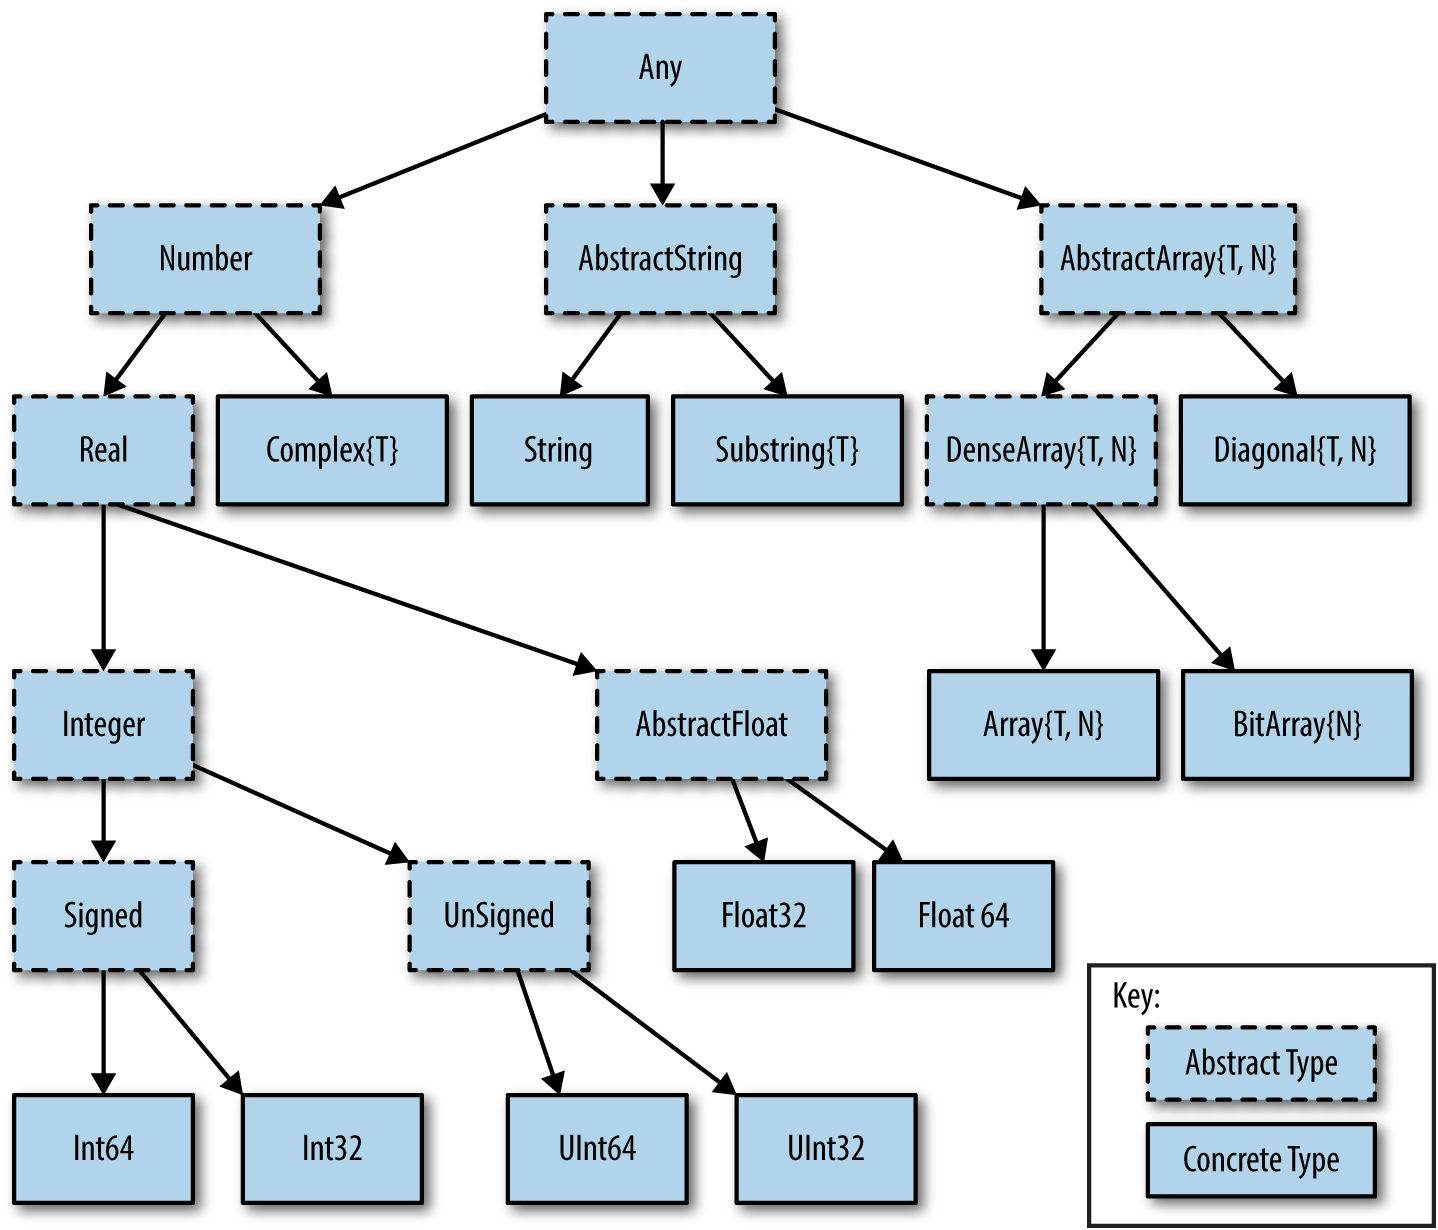


> * The **root type** of the tree is called Any.  if you define a function w/o specifying its arguments.Julia assumes by default that the Any type is allowed <br>
> * objects that have a defined/specific type are **concrete** (also called leaf - see diagram) <br>
> * all other that are not *leaf* are called **abstract** (w/o defined type Ex: Any or Function). Abstract types serve only as intermediate types allowing for logical grouping of other types

In [ ]:
# Only concrete types can be instantiated and cannot have concrete subtypes
# isconcretetype()
# isabstracttype()
# However, some types are neither abstract nor concrete Ex. Vector.

In [4]:
function print_supertypes(T)
    println(T)
    T == Any || print_supertypes(supertype(T)) # recursive
    return nothing
end

print_supertypes (generic function with 1 method)

In [5]:
print_supertypes(Int64)
# read from bottom to top

Int64
Signed
Integer
Real
Number
Any


>  **Union{Signed, Unsigned, String, Missing}**, you tell Julia that you allow any ofthe types specified inside the curly brackets after the Union keyword. (you indicate that a value must be a String but can optionally be missing)

implementing 3 methods for 1 function

In [6]:
fun(x) = println("unsupported type")

fun (generic function with 1 method)

In [7]:
fun(x::Number) = println("a number was passed")

fun (generic function with 2 methods)

In [8]:
fun(x::Float64) = println("a Float64 value")

fun (generic function with 3 methods)

**Check Methods**

In [9]:
methods(fun)

# 3 methods for generic function "fun" from Main:
 [1] fun(x::Float64)
     @ c:\Users\vitto\OneDrive\Documents\julia\02julia_nb.ipynb:1
 [2] fun(x::Number)
     @ c:\Users\vitto\OneDrive\Documents\julia\02julia_nb.ipynb:1
 [3] fun(x)
     @ c:\Users\vitto\OneDrive\Documents\julia\02julia_nb.ipynb:1

In [10]:
fun("hello!")

unsupported type


In [11]:
fun(1)

a number was passed


In [12]:
fun(1.0)

a Float64 value


In [13]:
fun(-10)

a number was passed


## No method ambiguity

In [14]:
bar(x, y) = "no numbers passed"
bar(x::Number, y) = "first argument is a number"
bar(x, y::Number) = "second argument is a number"

bar (generic function with 3 methods)

In [16]:
bar("hello", "world")

"no numbers passed"

In [15]:
bar(1, "world")

"first argument is a number"

In [17]:
bar("hello", 2)

"second argument is a number"

In [18]:
bar(1, 2)

MethodError: MethodError: bar(::Int64, ::Int64) is ambiguous.

Candidates:
  bar(x, y::Number)
    @ Main c:\Users\vitto\OneDrive\Documents\julia\02julia_nb.ipynb:3
  bar(x::Number, y)
    @ Main c:\Users\vitto\OneDrive\Documents\julia\02julia_nb.ipynb:2

Possible fix, define
  bar(::Number, ::Number)


> In this case, Julia complains that it does not
know which method should be called, as two of them potentially could be selected.

In [19]:
bar(x::Number, y::Number) = "both arguments are numbers"

bar (generic function with 4 methods)

In [20]:
bar(1, 2)

"both arguments are numbers"

Level up our function

In [21]:
function winsorized_mean(x::AbstractVector, k::Integer)
    # if k is not
    k >= 0 || throw(ArgumentError("k must be non-negative"))
    # if len(x) is not 
    length(x) > 2 * k || throw(ArgumentError("k is too large"))
    # for k=3 you need a vector of length 6+1 minimun
    y = sort!(collect(x))
    for i in 1:k
    y[i] = y[k + 1]
    y[end - i + 1] = y[end - k]
    end
    return sum(y) / length(y)
end

winsorized_mean (generic function with 1 method)

In [22]:
winsorized_mean([8, 3, 1, 5, 7], 1)

5.0

In [23]:
winsorized_mean(1:10, "a")

MethodError: MethodError: no method matching winsorized_mean(::UnitRange{Int64}, ::String)

Closest candidates are:
  winsorized_mean(::AbstractVector, !Matched::Integer)
   @ Main c:\Users\vitto\OneDrive\Documents\julia\02julia_nb.ipynb:1


In [24]:
winsorized_mean(1:10, -1)

ArgumentError: ArgumentError: k must be non-negative

In [26]:
winsorized_mean(1:10, 5)

ArgumentError: ArgumentError: k is too large

## The include
include("file1.jl") <br>
include("file2.jl") <br>
include("file3.jl") <br>
> Then, if you execute it, simplifying a bit, it would work as if you had copied and pasted
the contents of file1.jl into it, then copied and pasted the contents of file2.jl into it,
and finally copied and pasted file3.jl.

## Modules
see page 61, not of much help for the moment

## Packages
the import 

In [29]:
import Statistics as st

In [28]:
x = [1, 2, 3]

3-element Vector{Int64}:
 1
 2
 3

In [30]:
st.mean(x)

2.0

> with the using keyword, we bring all exported functionalities of the module into the scope so they can be used directly

In [31]:
using Statistics

In [32]:
mean(x) # no st needed

2.0

In [33]:
mean = 1

ErrorException: cannot assign a value to imported variable Statistics.mean from module Main

In [36]:
using StatsBase

In [45]:
mean(winsor([8, 3, 1, 5, 7], count=1))

5.0

# Using macros